In [1]:
from dolfin import *

from mshr import *

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as tri

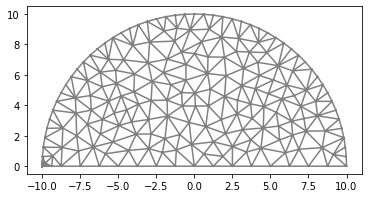

In [2]:
Rad = 10
#Ri = 1.
num_seg = 100

domain = Circle(Point(0., 0.), Rad, num_seg)
domain = (domain - Rectangle(Point(-Rad, -Rad), Point(Rad, 0.)) - Rectangle(Point(-Rad/2, 0.), Point(Rad/2, 0.)))

mesh_res = 10
mesh = generate_mesh(domain, mesh_res)

plot(mesh)

In [3]:
# Definimos espacios funcionales
function_space = FunctionSpace(mesh, 'Lagrange', 1)

In [4]:
# Definimos funciones trial y test
u = TrialFunction(function_space)
v = TestFunction(function_space)

In [5]:
# Definimos condiciones de borde
def outer_boundary(x, on_boundary):
    x,y = x[0], x[1]
    return on_boundary and near(np.sqrt(x**2 + y**2), Rad, 5e-2)

def bottom_boundary(x, on_boundary):
    return on_boundary and near(x[1], 0.0)

In [6]:
# Inicializamos las condiciones de borde
outer_bc = DirichletBC(function_space, Constant(0), outer_boundary)
bottom_bc = DirichletBC(function_space, Constant(0), bottom_boundary)

boundaries = [outer_bc, bottom_bc]

In [7]:
# Definimos las partes del problema variacional
left_integrand = inner(nabla_grad(u), nabla_grad(v)) * dx

f =  Expression("x[0]*x[0] + x[1]*x[1]", degree=1)

right_integrand = f*v*dx

In [8]:
# Ensamblamos el problema de algebra lineal
# Ensamblamos la Matris A
A = assemble(left_integrand)

# Ensamblamos el vector b
b = assemble(right_integrand)

# Aplicamos las condiciones de borde
[bc.apply(A,b) for bc in boundaries]

# Creamos un placeholder para la  solucion
solution = Function(function_space) 

# Calculamos la solucion
solve(A, solution.vector(), b)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


1

In [9]:
# Ahora pongamoslo en dos lineas :3
solution = Function(function_space)
solve(left_integrand == right_integrand, solution, boundaries)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


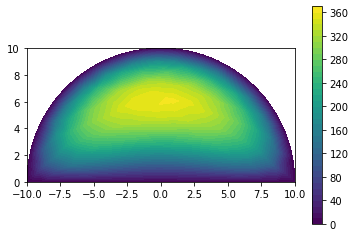

In [10]:
# Grafiquemos la solucion
p = plot(solution)
plt.colorbar(p)
plt.show()